In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import pandas as pd


In [2]:
def generate_equilateral_triangle(A, d):

    n = len(A)
    u = np.random.randn(n)
    u /= np.linalg.norm(u)  
    B = A + d * u

    v = np.random.randn(n)
    v -= np.dot(v, u) * u  
    v /= np.linalg.norm(v) 

    v *= (np.sqrt(3) * d) / 2
    
    C = A + (d / 2) * u + v
    
    A =np.array(A)
    B=np.array(B)
    C=np.array(C)
    return [A, B, C]

In [10]:
def generate_points_random_in_sphere(center, radius, num_points):
    """
    Generar puntos altamente aleatorios dentro de una esfera.
    """
    points = []
    for _ in range(num_points):
        # Generar un vector aleatorio en R^n sin normalizar completamente
        vec = np.random.randn(len(center))  # Vector aleatorio con distribución normal
        # Escalar con un radio aleatorio más sesgado para no ser uniforme
        r = radius * np.random.random() ** (1 / len(center))  # Ajuste no uniforme del radio
        # Añadir el punto desplazado por el centro
        points.append(center + r * vec)
    return np.array(points)


def generate_points_uniform_in_sphere(center, radius, num_points):
    """
    Generar puntos uniformemente distribuidos dentro de una esfera.
    """
    points = []
    for _ in range(num_points):
        vec = np.random.normal(0, 1, len(center))  # Vector aleatorio en R^n
        vec /= np.linalg.norm(vec)  # Normalizar a un vector unitario
        r = np.random.uniform(0, radius)  # Escalar con radio aleatorio
        points.append(center + r * vec)
    return np.array(points)

def generate_points_uniform_on_surface(center, radius, num_points):
    """
    Generar puntos uniformemente distribuidos sobre la superficie de una esfera.
    """
    points = []
    for _ in range(num_points):
        vec = np.random.normal(0, 1, len(center))  # Vector aleatorio en R^n
        vec /= np.linalg.norm(vec)  # Normalizar a un vector unitario
        points.append(center + radius * vec)
    return np.array(points)

def generate_points_near_surface(center, radius, num_points):
    """
    Generar puntos concentrados cerca de la superficie de una esfera usando distribución beta.
    """
    points = []
    for _ in range(num_points):
        vec = np.random.normal(0, 1, len(center))  # Vector aleatorio en R^n
        vec /= np.linalg.norm(vec)  # Normalizar a un vector unitario
        r = radius * np.random.beta(5, 2)  # Concentrar radio cerca del borde
        points.append(center + r * vec)
    return np.array(points)

# Parámetros
d=10
k = 4
A = np.zeros(k)+1
centers = generate_equilateral_triangle(A, d)  # Centros de las esferas
radii = [4, 4, 4.2]  # Radios de las esferas
num_points_per_sphere = 550# Número de puntos por clase

# Generar puntos para cada esfera con diferentes distribuciones
points_class_1 = generate_points_random_in_sphere(centers[0], radii[0], num_points_per_sphere)
points_class_2 = generate_points_random_in_sphere(centers[1], radii[1], num_points_per_sphere)
points_class_3 = generate_points_random_in_sphere(centers[2], radii[2], num_points_per_sphere)



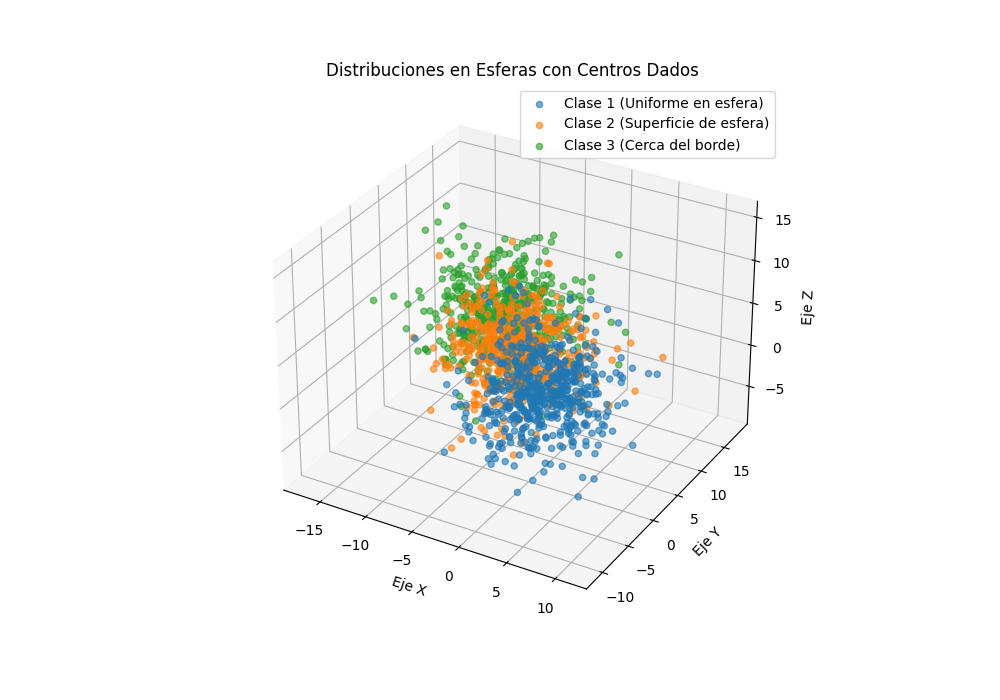

In [11]:

# Visualización en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar cada clase
ax.scatter(points_class_1[:, 2], points_class_1[:, 1], points_class_1[:, 3], label='Clase 1 (Uniforme en esfera)', alpha=0.6)
ax.scatter(points_class_2[:, 2], points_class_2[:, 1], points_class_2[:, 3], label='Clase 2 (Superficie de esfera)', alpha=0.6)
ax.scatter(points_class_3[:, 2], points_class_3[:, 1], points_class_3[:, 3], label='Clase 3 (Cerca del borde)', alpha=0.6)

# Configuración del gráfico
ax.set_title("Distribuciones en Esferas con Centros Dados")
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
ax.set_zlabel("Eje Z")
ax.legend()
plt.show()

In [12]:
# Crear un DataFrame combinando los puntos y las etiquetas para cada clase
def points_to_dataframe(points, label):
    """
    Convertir puntos y etiquetas en un DataFrame.
    """
    df = pd.DataFrame(points, columns=[f"Dim{i+1}" for i in range(points.shape[1])])
    df['Label'] = label
    return df



# Crear DataFrames para cada clase
df_class_1 = points_to_dataframe(points_class_1, "0")
df_class_2 = points_to_dataframe(points_class_2, "1")
df_class_3 = points_to_dataframe(points_class_3, "2")

# Combinar los DataFrames en uno solo
df_combined = pd.concat([df_class_1, df_class_2, df_class_3], ignore_index=True)

# # Exportar a un archivo CSV
# file_path = "data8.csv"
# df_combined.to_csv(file_path, index=False)


df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dim1    1650 non-null   float64
 1   Dim2    1650 non-null   float64
 2   Dim3    1650 non-null   float64
 3   Dim4    1650 non-null   float64
 4   Label   1650 non-null   object 
dtypes: float64(4), object(1)
memory usage: 64.6+ KB


In [13]:
df_combined

,Dim1,Dim2,Dim3,Dim4,Label
0,2.751583,2.624342,-1.176787,0.123560,0
1,1.059510,6.026241,-2.912831,5.526460,0
2,0.326624,4.435282,-0.000434,-0.118695,0
3,0.475639,0.129836,0.814803,1.624152,0
4,2.305566,-2.948008,5.668645,4.797595,0
...,...,...,...,...,...
1645,-0.843181,7.986089,-6.334600,8.695700,2
1646,-3.095993,1.345623,-5.115797,6.195457,2
1647,-1.929571,3.090878,-10.503311,5.661321,2
1648,-1.895569,12.888431,-6.071048,7.777448,2


In [14]:
df_combined.to_csv("optint.csv",index=False)

In [ ]:
# x=np.zeros(100)
# [A,B,C] =generate_equilateral_triangle(x, d)
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')

# # Graficar cada clase
# ax.scatter(A[1], A[2], A[2], label='Clase 1 (Uniforme en esfera)', alpha=0.6)
# ax.scatter(C[1], C[2], C[2], label='Clase 2 (Superficie de esfera)', alpha=0.6)
# ax.scatter(B[1], B[2], B[2], label='Clase 3 (Cerca del borde)', alpha=0.6)

# # Configuración del gráfico
# ax.set_title("Distribuciones en Esferas con Centros Dados")
# ax.set_xlabel("Eje X")
# ax.set_ylabel("Eje Y")
# ax.set_zlabel("Eje Z")
# ax.legend()
# plt.show()

In [ ]:
# A[: 2]